# sql_challenge

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
import psycopg2

In [2]:
#Create engine
from sqlalchemy import create_engine
engine = create_engine(f'postgresql://postgres:<your_db_name>@localhost:5432/SQL-Challenge')
connection = engine.connect()

In [3]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['dept_emp', 'dept_manager', 'titles', 'departments', 'employees', 'salaries']

In [6]:
# Read-in the employees, salaries and the titles tables
salary_df = pd.read_sql('select * from salaries', connection)
titles_df = pd.read_sql('select * from titles', connection)
employees_df = pd.read_sql('select * from employees', connection)

In [9]:
# Change column name
employees_rn_df = employees_df.rename(columns={"emp_title_id": "title_id"})

In [11]:
#Merge files
com_data=pd.merge(employees_rn_df, titles_df, how='outer', on='title_id')
final_df = pd.merge(com_data, salary_df, how= 'outer', on='emp_no')
final_df.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,title,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,Staff,40000
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,Staff,40000
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,Staff,56087
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,Staff,87084
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,Staff,63016


# Create Graphs

In [12]:
#Calculate number of bins for histogram: From https://datatofish.com/plot-histogram-python/
sal_count=final_df['salary'].count()
sal_min=final_df['salary'].min()
sal_max=final_df['salary'].max()
print(f'Count; {sal_count}')
print(f'Min salary: {sal_min}')
print(f'Max salary: {sal_max}')
print(f'Number of bins: {round(sal_count**.5,2)}')
#Too many bins!!

Count; 300024
Min salary: 40000
Max salary: 129492
Number of bins: 547.74


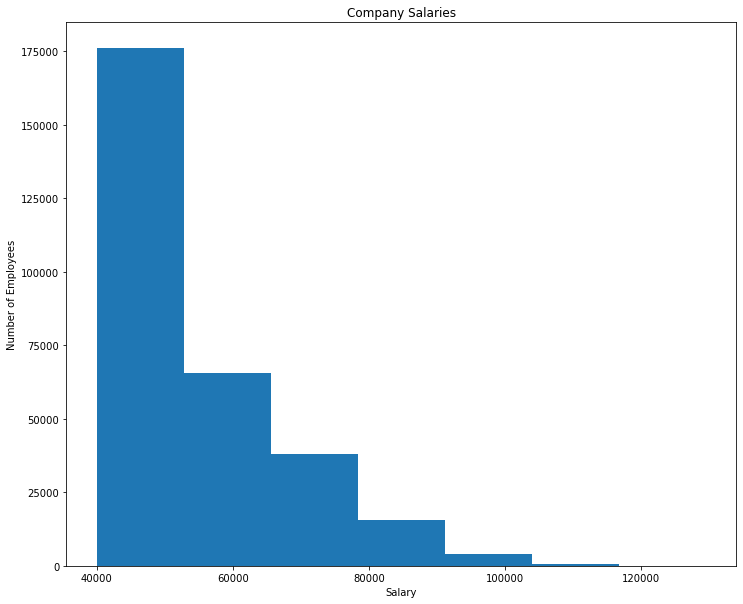

In [13]:
#Histogram

x = final_df['salary']
plt.figure(figsize= (12,10))
plt.hist(x, bins=7) #number of bins = number of titles
plt.title('Company Salaries')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.show()

In [14]:
#Calculate average salary by title
final_grouped_df=final_df.groupby(['title'])
avg_salary_title=final_grouped_df['salary'].mean() 

Text(0, 0.5, 'Average Salary')

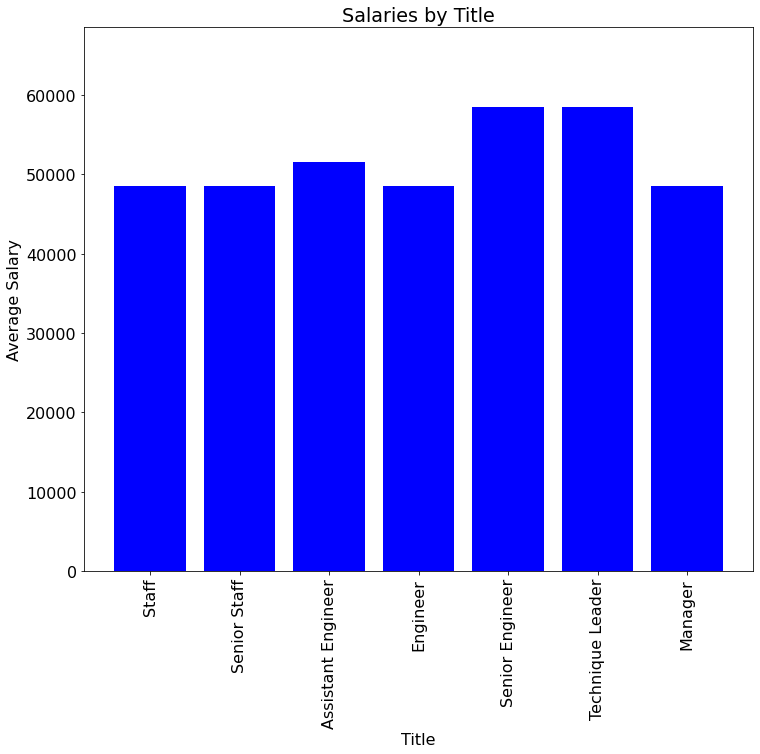

In [15]:
#Bar Chart
dnames= titles_df['title']

x_axis=range(len(dnames))
#y_axis=avg_salary_title
tick_locations=[value for value in x_axis]
plt.figure(figsize= (12,10))
plt.rcParams['font.size']='16'
plt.bar(x_axis, avg_salary_title, color='b', alpha=1.0, align="center")
plt.xticks(tick_locations, dnames, rotation="vertical")

plt.ylim(0, max(avg_salary_title)+10000)
plt.title('Salaries by Title')
plt.xlabel('Title')
plt.ylabel('Average Salary')